# Nearest Neighbor

#### Decide on a notion of similarity
Find the documents that are most similar
In the assignment you will

Gain intuition for different notions of similarity and practice finding similar documents.
Explore the tradeoffs with representing documents using raw word counts and TF-IDF
Explore the behavior of different distance metrics by looking at the Wikipedia pages most similar to President Obama’s page.

In [1]:
import graphlab
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
wiki = graphlab.SFrame('people_wiki.gl')

In [3]:
wiki

URI,name,text
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...


In [6]:
wiki['word_count'] = graphlab.text_analytics.count_words(wiki['text'])

In [7]:
wiki

URI,name,text,word_count
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...,"{'since': 1L, 'carltons':1L, 'being': 1L, '2005': ..."
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...,"{'precise': 1L, 'thomas':1L, 'closely': 1L, ..."
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...,"{'just': 1L, 'issued':1L, 'mainly': 1L, ..."
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...,"{'all': 1L,'bauforschung': 1L, ..."
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...,"{'legendary': 1L,'gangstergenka': 1L, ..."
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...,"{'now': 1L, 'currently':1L, 'less': 1L, 'being': ..."
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...,"{'exclusive': 2L,'producer': 1L, 'tribe': ..."
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...,"{'taxi': 1L, 'salon': 1L,'gangs': 1L, 'being': ..."
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...,"{'houston': 1L,'frankie': 1L, 'labels': ..."
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...,"{'phenomenon': 1L,'deborash': 1L, ..."


# Find nearest Neighbor

#### Let's start by finding the nearest neighbors of the Barack Obama page using the word count vectors to represent the articles and Euclidean distance to measure distance. For this, again will we use a GraphLab Create implementation of nearest neighbor search.


In [8]:
model = graphlab.nearest_neighbors.create(wiki, label='name', features=['word_count'],
                                          method='brute_force', distance='euclidean')

Starting brute force nearest neighbors model training.

In [9]:
model.query(wiki[wiki['name']=='Barack Obama'], label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 14.965ms     |

| Done         |         | 100         | 129.655ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Barack Obama,Barack Obama,0.0,1
Barack Obama,Joe Biden,33.0756708171,2
Barack Obama,George W. Bush,34.3947670438,3
Barack Obama,Lawrence Summers,36.1524549651,4
Barack Obama,Mitt Romney,36.1662826401,5
Barack Obama,Francisco Barrio,36.3318042492,6
Barack Obama,Walter Mondale,36.4005494464,7
Barack Obama,Wynn Normington Hugh-Jones ...,36.4965751818,8
Barack Obama,Don Bonker,36.633318168,9
Barack Obama,Andy Anstett,36.9594372252,10


In [10]:
def top_words(name):
    """
    Get a table of the most frequent words in the given person's wikipedia page.
    """
    row = wiki[wiki['name'] == name]
    word_count_table = row[['word_count']].stack('word_count', new_column_name=['word','count'])
    return word_count_table.sort('count', ascending=False)

In [11]:
obama_words = top_words('Barack Obama')
obama_words

word,count
the,40
in,30
and,21
of,18
to,14
his,11
obama,9
act,8
a,7
he,7


In [12]:
barrio_words = top_words('Francisco Barrio')
barrio_words

word,count
the,36
of,24
and,18
in,17
he,10
to,9
chihuahua,7
a,6
governor,6
his,5


In [13]:
combined_words = obama_words.join(barrio_words, on='word')
combined_words

word,count,count.1
the,40,36
in,30,17
and,21,18
of,18,24
to,14,9
his,11,5
a,7,6
he,7,10
as,6,5
was,5,4


In [14]:
combined_words = combined_words.rename({'count':'Obama', 'count.1':'Barrio'})
combined_words

word,Obama,Barrio
the,40,36
in,30,17
and,21,18
of,18,24
to,14,9
his,11,5
a,7,6
he,7,10
as,6,5
was,5,4


In [15]:
combined_words.sort('Obama', ascending=False)

word,Obama,Barrio
the,40,36
in,30,17
and,21,18
of,18,24
to,14,9
his,11,5
a,7,6
he,7,10
as,6,5
was,5,4


### Question. Among the words that appear in both Barack Obama and Francisco Barrio, take the 5 that appear most frequently in Obama. How many of the articles in the Wikipedia dataset contain all of those 5 words?

In [16]:
common_words = combined_words['word'][0:5]  # YOUR CODE HERE

def has_top_words(word_count_vector):
    # extract the keys of word_count_vector and convert it to a set
    unique_words = set(word_count_vector.keys())   # YOUR CODE HERE
    # return True if common_words is a subset of unique_words
    # return False otherwise
    return set(common_words).issubset(unique_words)  # YOUR CODE HERE

wiki['has_top_words'] = wiki['word_count'].apply(has_top_words)

# use has_top_words column to answer the quiz question
wiki['has_top_words'].sum() 

56066L

In [17]:
wiki.head(5)


URI,name,text,word_count,has_top_words
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...,"{'since': 1L, 'carltons':1L, 'being': 1L, '2005': ...",1
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...,"{'precise': 1L, 'thomas':1L, 'closely': 1L, ...",1
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...,"{'just': 1L, 'issued':1L, 'mainly': 1L, ...",1
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...,"{'all': 1L,'bauforschung': 1L, ...",1
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...,"{'legendary': 1L,'gangstergenka': 1L, ...",0


In [18]:
has_top_words(wiki[32]['word_count'])

True

In [19]:
has_top_words(wiki[33]['word_count'])

False

### Question. Measure the pairwise distance between the Wikipedia pages of Barack Obama, George W. Bush, and Joe Biden. Which of the three pairs has the smallest distance?

In [20]:
wiki['word_count'][wiki['name']=='Barack Obama'][0]

{'13th': 1L,
 '1961': 1L,
 '1992': 1L,
 '1996': 1L,
 '1997': 1L,
 '20': 2L,
 '2000in': 1L,
 '2004': 3L,
 '2007': 1L,
 '2008': 1L,
 '2009': 3L,
 '2010': 2L,
 '2011': 3L,
 '2012': 1L,
 '2012obama': 1L,
 '2013': 1L,
 '4': 1L,
 '44th': 1L,
 '63': 1L,
 '8': 1L,
 'a': 7L,
 'act': 8L,
 'address': 1L,
 'administration': 1L,
 'affordable': 1L,
 'afghanistan': 2L,
 'african': 1L,
 'after': 4L,
 'against': 1L,
 'american': 3L,
 'americans': 1L,
 'and': 21L,
 'arms': 1L,
 'as': 6L,
 'ask': 1L,
 'at': 2L,
 'attention': 1L,
 'attorney': 1L,
 'august': 1L,
 'barack': 1L,
 'before': 1L,
 'began': 1L,
 'bin': 1L,
 'bm': 1L,
 'born': 2L,
 'briefs': 1L,
 'brk': 1L,
 'budget': 1L,
 'by': 1L,
 'californias': 1L,
 'called': 1L,
 'campaign': 3L,
 'care': 1L,
 'chicago': 2L,
 'civil': 1L,
 'clinton': 1L,
 'close': 1L,
 'columbia': 1L,
 'combat': 1L,
 'community': 1L,
 'constitutional': 1L,
 'consumer': 1L,
 'continued': 1L,
 'control': 4L,
 'convention': 1L,
 'court': 1L,
 'creation': 1L,
 'cuba': 1L,
 'curre

In [21]:
print graphlab.distances.euclidean(wiki['word_count'][wiki['name']=='Barack Obama'][0], 
                                   wiki['word_count'][wiki['name']=='George W. Bush'][0])
print graphlab.distances.euclidean(wiki['word_count'][wiki['name']=='Barack Obama'][0], 
                                   wiki['word_count'][wiki['name']=='Joe Biden'][0])
print graphlab.distances.euclidean(wiki['word_count'][wiki['name']=='George W. Bush'][0], 
                                   wiki['word_count'][wiki['name']=='Joe Biden'][0])

34.3947670438
33.0756708171
32.7566787083


In [22]:
def get_common_words(name1, name2, num_of_words=10):
    words1 = top_words(name1)
    words2 = top_words(name2)
    combined_words = words1.join(words2, on='word')
    return combined_words.sort('count', ascending=False)[0:num_of_words]

In [23]:
get_common_words('Barack Obama', 'George W. Bush')

word,count,count.1
the,40,39
in,30,22
and,21,14
of,18,14
to,14,11
his,11,6
act,8,3
he,7,8
a,7,6
as,6,6


### Still the common words are irrelevant for calculating similarity


# TF-IDF

In [24]:
wiki['tf_idf'] = graphlab.text_analytics.tf_idf(wiki['word_count'])

In [25]:
model_tf_idf = graphlab.nearest_neighbors.create(wiki, label='name', features=['tf_idf'],
                                                 method='brute_force', distance='euclidean')

Starting brute force nearest neighbors model training.

In [26]:
model_tf_idf.query(wiki[wiki['name'] == 'Barack Obama'], label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 11.97ms      |

| Done         |         | 100         | 150.598ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Barack Obama,Barack Obama,0.0,1
Barack Obama,Phil Schiliro,106.861013691,2
Barack Obama,Jeff Sessions,108.871674216,3
Barack Obama,Jesse Lee (politician),109.045697909,4
Barack Obama,Samantha Power,109.108106165,5
Barack Obama,Bob Menendez,109.781867105,6
Barack Obama,Eric Stern (politician),109.95778808,7
Barack Obama,James A. Guest,110.413888718,8
Barack Obama,Roland Grossenbacher,110.4706087,9
Barack Obama,Tulsi Gabbard,110.696997999,10


In [27]:
wiki.head(4)

Columns:
	URI	str
	name	str
	text	str
	word_count	dict
	has_top_words	int
	tf_idf	dict

Rows: 4

Data:
+-------------------------------+---------------------+
|              URI              |         name        |
+-------------------------------+---------------------+
| <http://dbpedia.org/resour... |    Digby Morrell    |
| <http://dbpedia.org/resour... |    Alfred J. Lewy   |
| <http://dbpedia.org/resour... |    Harpdog Brown    |
| <http://dbpedia.org/resour... | Franz Rottensteiner |
+-------------------------------+---------------------+
+-------------------------------+-------------------------------+---------------+
|              text             |           word_count          | has_top_words |
+-------------------------------+-------------------------------+---------------+
| digby morrell born 10 octo... | {'since': 1L, 'carltons': ... |       1       |
| alfred j lewy aka sandy le... | {'precise': 1L, 'thomas': ... |       1       |
| harpdog brown is a singer ... | {'just': 1L, 'issued': 1L,... |       1       |
| franz rottensteiner born i... | {'all': 1L, 'bauforschung'... |       1       |
+-------------------------------+-------------------------------+---------------+
+-------------------------------+
|             tf_idf            |
+-------------------------------+
| {'since': 1.45537671730804... |
| {'precise': 6.443200606955... |
| {'just': 2.700729968710864... |
| {'all': 1.6431112434912472... |
+-------------------------------+
[4 rows x 6 columns]

In [28]:
def top_words_tf_idf(name):
    row = wiki[wiki['name'] == name]
    word_count_table = row[['tf_idf']].stack('tf_idf', new_column_name=['word','weight'])
    return word_count_table.sort('weight', ascending=False)

In [29]:
obama_tf_idf = top_words_tf_idf('Barack Obama')
obama_tf_idf

word,weight
obama,43.2956530721
act,27.678222623
iraq,17.747378588
control,14.8870608452
law,14.7229357618
ordered,14.5333739509
military,13.1159327785
involvement,12.7843852412
response,12.7843852412
democratic,12.4106886973


In [30]:
schiliro_tf_idf = top_words_tf_idf('Phil Schiliro')
schiliro_tf_idf

word,weight
schiliro,21.9729907785
staff,15.8564416352
congressional,13.5470876563
daschleschiliro,10.9864953892
obama,9.62125623824
waxman,9.04058524017
president,9.03358661416
2014from,8.68391029623
law,7.36146788088
consultant,6.91310403725


In [31]:
combined_tf_idf_words = obama_tf_idf.join(schiliro_tf_idf, on='word')
combined_tf_idf_words.sort('weight', ascending=False)

word,weight,weight.1
obama,43.2956530721,9.62125623824
law,14.7229357618,7.36146788088
democratic,12.4106886973,6.20534434867
senate,10.1642881797,3.3880960599
presidential,7.3869554189,3.69347770945
president,7.22686929133,9.03358661416
policy,6.09538628214,3.04769314107
states,5.47320098963,1.82440032988
office,5.24817282322,2.62408641161
2011,5.10704127031,3.40469418021


In [32]:
common_words = combined_tf_idf_words['word'][0:5]  # YOUR CODE HERE

def has_top_words(word_count_vector):
    # extract the keys of word_count_vector and convert it to a set
    unique_words = set(word_count_vector.keys())   # YOUR CODE HERE
    # return True if common_words is a subset of unique_words
    # return False otherwise
    return set(common_words).issubset(unique_words)  # YOUR CODE HERE

wiki['has_top_words'] = wiki['word_count'].apply(has_top_words)

# use has_top_words column to answer the quiz question
wiki['has_top_words'].sum()

14L

In [33]:
print graphlab.distances.euclidean(wiki['tf_idf'][wiki['name']=='Barack Obama'][0],
                                   wiki['tf_idf'][wiki['name']=='Joe Biden'][0])

123.29745601


In [34]:
model_tf_idf.query(wiki[wiki['name'] == 'Barack Obama'], label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 16.956ms     |

| Done         |         | 100         | 164.562ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Barack Obama,Barack Obama,0.0,1
Barack Obama,Phil Schiliro,106.861013691,2
Barack Obama,Jeff Sessions,108.871674216,3
Barack Obama,Jesse Lee (politician),109.045697909,4
Barack Obama,Samantha Power,109.108106165,5
Barack Obama,Bob Menendez,109.781867105,6
Barack Obama,Eric Stern (politician),109.95778808,7
Barack Obama,James A. Guest,110.413888718,8
Barack Obama,Roland Grossenbacher,110.4706087,9
Barack Obama,Tulsi Gabbard,110.696997999,10


In [35]:
def compute_length(row):
    return len(row['text'])

wiki['length'] = wiki.apply(compute_length)

In [36]:
wiki.head(4)

Columns:
	URI	str
	name	str
	text	str
	word_count	dict
	has_top_words	int
	tf_idf	dict
	length	int

Rows: 4

Data:
+-------------------------------+---------------------+
|              URI              |         name        |
+-------------------------------+---------------------+
| <http://dbpedia.org/resour... |    Digby Morrell    |
| <http://dbpedia.org/resour... |    Alfred J. Lewy   |
| <http://dbpedia.org/resour... |    Harpdog Brown    |
| <http://dbpedia.org/resour... | Franz Rottensteiner |
+-------------------------------+---------------------+
+-------------------------------+-------------------------------+---------------+
|              text             |           word_count          | has_top_words |
+-------------------------------+-------------------------------+---------------+
| digby morrell born 10 octo... | {'since': 1L, 'carltons': ... |       0       |
| alfred j lewy aka sandy le... | {'precise': 1L, 'thomas': ... |       0       |
| harpdog brown is a singer ... | {'just': 1L, 'issued': 1L,... |       0       |
| franz rottensteiner born i... | {'all': 1L, 'bauforschung'... |       0       |
+-------------------------------+-------------------------------+---------------+
+-------------------------------+--------+
|             tf_idf            | length |
+-------------------------------+--------+
| {'since': 1.45537671730804... |  1479  |
| {'precise': 6.443200606955... |  1466  |
| {'just': 2.700729968710864... |  1297  |
| {'all': 1.6431112434912472... |  2364  |
+-------------------------------+--------+
[4 rows x 7 columns]

In [37]:
nearest_neighbors_euclidean = model_tf_idf.query(wiki[wiki['name'] == 'Barack Obama'], label='name', k=100)
nearest_neighbors_euclidean = nearest_neighbors_euclidean.join(wiki[['name', 'length']], on={'reference_label':'name'})

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 12.968ms     |

| Done         |         | 100         | 155.585ms    |

+--------------+---------+-------------+--------------+

In [38]:
nearest_neighbors_euclidean.sort('rank')

query_label,reference_label,distance,rank,length
Barack Obama,Barack Obama,0.0,1,3278
Barack Obama,Phil Schiliro,106.861013691,2,1288
Barack Obama,Jeff Sessions,108.871674216,3,1398
Barack Obama,Jesse Lee (politician),109.045697909,4,1374
Barack Obama,Samantha Power,109.108106165,5,1911
Barack Obama,Bob Menendez,109.781867105,6,1222
Barack Obama,Eric Stern (politician),109.95778808,7,1589
Barack Obama,James A. Guest,110.413888718,8,1251
Barack Obama,Roland Grossenbacher,110.4706087,9,1099
Barack Obama,Tulsi Gabbard,110.696997999,10,1352


### these document lengths compare to the lengths of other documents in the corpus, let's make a histogram of the document lengths of Obama's 100 nearest neighbors and compare to a histogram of document lengths for all documents

C:\Users\TEJAS\.conda\envs\ml_environment\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


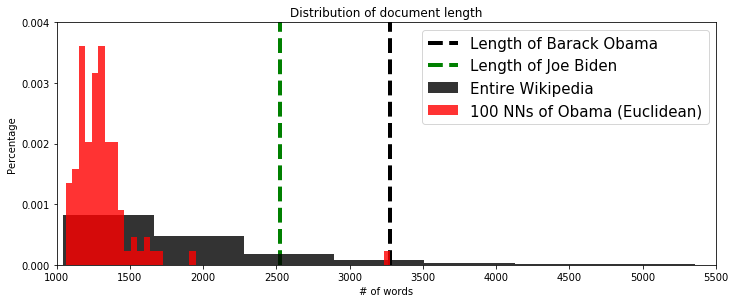

In [39]:
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'][0], color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'][0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([1000, 5500, 0, 0.004])

plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size':16})
plt.tight_layout()


### 
Relative to the rest of Wikipedia, nearest neighbors of Obama are overwhemingly short, most of them being shorter than 2000 words. The bias towards short articles is not appropriate in this application as there is really no reason to favor short articles over long articles (they are all Wikipedia articles, after all). Many Wikipedia articles are 2500 words or more, and both Obama and Biden are over 2500 words long.

Note: Both word-count features and TF-IDF are proportional to word frequencies. While TF-IDF penalizes very common words, longer articles tend to have longer TF-IDF vectors simply because they have more words in them.

To remove this bias, we turn to cosine distances:


# Cosine Distance

In [40]:
model2_tf_idf = graphlab.nearest_neighbors.create(wiki, label='name', features=['tf_idf'],
                                                  method='brute_force', distance='cosine')

Starting brute force nearest neighbors model training.

In [41]:
nearest_neighbors_cosine = model2_tf_idf.query(wiki[wiki['name'] == 'Barack Obama'], label='name', k=100)
nearest_neighbors_cosine = nearest_neighbors_cosine.join(wiki[['name', 'length']], on={'reference_label':'name'})

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 11.97ms      |

| Done         |         | 100         | 141.621ms    |

+--------------+---------+-------------+--------------+

In [42]:
nearest_neighbors_cosine.sort('rank')

query_label,reference_label,distance,rank,length
Barack Obama,Barack Obama,0.0,1,3278
Barack Obama,Joe Biden,0.703138676734,2,2523
Barack Obama,Samantha Power,0.742981902328,3,1911
Barack Obama,Hillary Rodham Clinton,0.758358397887,4,3472
Barack Obama,Eric Stern (politician),0.770561227601,5,1589
Barack Obama,Robert Gibbs,0.784677504751,6,1572
Barack Obama,Eric Holder,0.788039072943,7,1430
Barack Obama,Jesse Lee (politician),0.790926415366,8,1374
Barack Obama,Henry Waxman,0.798322602893,9,1607
Barack Obama,Joe the Plumber,0.799466360042,10,1422


<Figure size 756x324 with 0 Axes>

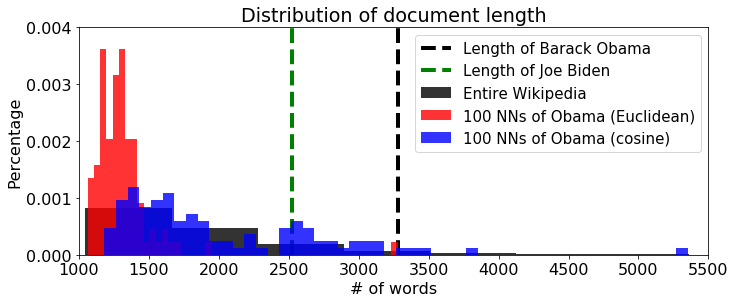

In [43]:
plt.figure(figsize=(10.5,4.5))
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.hist(nearest_neighbors_cosine['length'], 50, color='b', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (cosine)', zorder=11, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'][0], color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'][0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([1000, 5500, 0, 0.004])
plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()

Indeed, the 100 nearest neighbors using cosine distance provide a sampling across the range of document lengths, rather than just short articles like Euclidean distance provided.

Moral of the story: In deciding the features and distance measures, check if they produce results that make sense for your particular application

## Problem with cosine distances: tweets vs. long articles

In [45]:
sf = graphlab.SFrame({'text': ['democratic governments control law in response to popular act']})
sf['word_count'] = graphlab.text_analytics.count_words(sf['text'])

encoder = graphlab.feature_engineering.TFIDF(features=['word_count'], output_column_prefix='tf_idf')
encoder.fit(wiki)
sf = encoder.transform(sf)
sf

text,word_count,tf_idf.word_count
democratic governmentscontrol law in response ...,"{'control': 1L,'democratic': 1L, 'act': ...","{'control':3.721765211295327, ..."


In [46]:
tweet_tf_idf = sf[0]['tf_idf.word_count']
tweet_tf_idf

{'act': 3.4597778278724887,
 'control': 3.721765211295327,
 'democratic': 3.1026721743330414,
 'governments': 4.167571323949673,
 'in': 0.0009654063501214492,
 'law': 2.4538226269605703,
 'popular': 2.764478952022998,
 'response': 4.261461747058352,
 'to': 0.04694493768179923}

In [47]:
obama = wiki[wiki['name'] == 'Barack Obama']
obama_tf_idf = obama[0]['tf_idf']
graphlab.toolkits.distances.cosine(obama_tf_idf, tweet_tf_idf)

0.7059183777794327

In [48]:
model2_tf_idf.query(obama, label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 10.972ms     |

| Done         |         | 100         | 148.603ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Barack Obama,Barack Obama,0.0,1
Barack Obama,Joe Biden,0.703138676734,2
Barack Obama,Samantha Power,0.742981902328,3
Barack Obama,Hillary Rodham Clinton,0.758358397887,4
Barack Obama,Eric Stern (politician),0.770561227601,5
Barack Obama,Robert Gibbs,0.784677504751,6
Barack Obama,Eric Holder,0.788039072943,7
Barack Obama,Jesse Lee (politician),0.790926415366,8
Barack Obama,Henry Waxman,0.798322602893,9
Barack Obama,Joe the Plumber,0.799466360042,10
